# Chap03 - 텐서플로의 기본 이해하기

텐서플로의 핵심 구축 및 동작원리를 이해하고, 그래프를 만들고 관리하는 방법과 상수, 플레이스홀더, 변수 등 텐서플로의 '구성 요소'에 대해 알아보자.

## 3.1 연산 그래프

### 3.1.1 연산 그래프란?

그래프는 아래의 그림과 같이 노드(node)나 꼭지점(vertex)로 연결 되어 있는 개체(entity)의 집합을 부르는 용어다. 노드들은 변(edge)을 통해 서로 연결되어 있다. 

![](./images/graph.png)

데이터 흐름 그래프에서(DataFlow Grapy)의 변(edge) 어떤 노드에서 다른 노드로 흘러가는(flow) 데이터의 방향을 정한다.

텐서플로에서 그래프의 각 **노드는 하나의 연산을 나타내며, 입력값을 받아 다른 노드로 전달할 결과값을 출력**한다.

### 3.1.2 연산 그래프의 장점

텐서플로는 그래프의 연결 상태를 기반으로 연산을 최적화한다. 각 그래프에는 노드 간에 의존관계(dependency)가 존재한다.. 예를 들어, 아래의 그림 'A'에서 노드 `e`는 노드 `c`에 **직접의존**(direct dependeny)하고 있고, 노드 `a`에는 **간접의존**(indirect dependency) 한다.

![](./images/graph02.png)

위의 그림에서 노드`e`를 계산하기 위해서는 노드 `c, b, a`만 계산 해주면 된다. 따라서, **의존관계를 이용해 연산량이 최소화**할 수 있다. 이처럼 그래프를 통해 각 노드의 모든 의존관계를 파악할 수 있다.

## 3.2 그래프, 세션, 페치

### 3.2.1 그래프 만들기

`import tensorflow as tf`를 통해 텐서플로를 import 하면 그 시점에 비어 있는 기본 그래프가 만들어지며, 우리가 만드는 모든 노드들은 이 기본 그래프에 자동으로 연결된다.

In [1]:
import tensorflow as tf

다음과 같이 간단한 6개의 노드를 만들어 보자. 먼저 `a, b, c` 노드에 `5, 2, 3`을 대입한다.

In [2]:
a = tf.constant(5)
b = tf.constant(2)
c = tf.constant(3)

다음 `d, e, f` 노드에는 `a, b, c`노드를 이용하여 간단한 연산을 수행한다.

In [3]:
d = tf.multiply(a, b)  # a * b
e = tf.add(c, b)  # c + b
f = tf.subtract(d, e)  # d - e

위에서 정의한 노드 및 연산을 그래프로 그려보면 아래와 같다.

<img src="./images/graph03.png" width="60%" height="60%" />

텐서플로에서는 위의 코드처럼 곱셈, 덧셈, 뺄셈을 텐서플로의 `tf.<operator>`를 사용하여 나타낼 수 있을 뿐만아니라 축약 연산자 즉, `*, +, -` 등을 사용할 수 있다.

| TensorFlow 연산      | 축약 연산자 | 설명                                                       |
| -------------------- | ----------- | ---------------------------------------------------------- |
| `tf.add()`           | `a + b`     | a와 b를 더함                                               |
| `tf.multiply()`      | `a * b`     | a와 b를 곱함                                               |
| `tf.subtract()`      | `a - b`     | a에서 b를 뺌                                               |
| `tf.divide()`        | `a / b`     | a를 b로 나눔                                               |
| `tf.pow()`           | `a ** b`    | $a^b$ 를 계산                                              |
| `tf.mod()`           | `a % b`     | a를 b로 나눈 나머지를 구함                                 |
| `tf.logical_and()`   | `a & b`     | a와 b의 논리곱을 구함. `dtype`은 반드시 `tf.bool`이어야 함 |
| `tf.greater()`       | `a > b`     | $a > b$ 의 True/False 값을 반환                            |
| `tf.greater_equal()` | `a >= b`    | $a \ge b$ 의 True/False 값을 반환                          |
| `tf.less_equal()`    | `a <= b`    | $ a \le b$ 의 True/False 값을 반환                         |
| `tf.less()`          | `a < b`     | $a < b$ 의 True/False 값을 반환                            |
| `tf.negative()`      | `-a`        | a의 반대 부호 값을 반환                                    |
| `tf.logical_not()`   | `~a`        | a의 반대의 참거짓을 반환. `tf.bool` 텐서만 적용 가능       |
| `tf.abs()`           | `abs(a)`    | a의 각 원소의 절대값을 반환                              |
| `tf.logical_or()`    | `a I b`     | a와 b의 논리합을 구함. `dtype`은 반드시 `tf.bool`이어야 함 |


### 3.2.2 세션을 만들고 실행하기

3.2.1에서 정의한 노드 및 연산 그래프를 실행하려면 아래의 코드 처럼 **세션(Session)**을 만들고 실행하면 된다.

In [4]:
import tensorflow as tf

# 노드 및 연산 그래프 정의
a = tf.constant(5)
b = tf.constant(2)
c = tf.constant(3)

d = tf.multiply(a, b)  # a * b
e = tf.add(c, b)  # c + b
f = tf.subtract(d, e)  # d - e

# 세션을 만들고 연산그래프 실행
sess = tf.Session()
outs = sess.run(f)
sess.close()
print("outs = {}".format(outs))

outs = 5


먼저, `tf.Session()`에서 그래프를 시작한다. `Session`객체는 파이썬 객체와 데이터, 객체의 메모리가 할당되어 있는 실행 환경 사이를 연결하며, 중간 결과를 저장하고 최종 결과를 작업 환경으로 보내준다. 위의 코드에서는 `Session` 객체를 `sess = tf.Session()` 에 정의했다. 

연산 그래프를 실행하려면 `Session`객체의 `run()` 메소드를 사용해야한다. 위의 코드에서 `sess.run(f)`는 아래의 그림처럼 출력이 나와야 하는 `f`노드에서 시작해서 역방향으로 의존관계에 따라 노드의 연산을 수행한다. 

<img src="./images/graph04.png" width="60%" height="60%" />

연산 수행이 완료되면 `sess.close()`를 통해 사용한 메모리를 해제하는 것이 좋다.

### 3.2.3 그래프의 생성과 관리

3.2.1에서 살펴 보았듯이, 텐서플로를 import 하면 바로 기본 그래프가 자동으로 만들어진다. 이 뿐만아니라 그래프를 추가로 생성하고 특정 연산의 관계를 직접 제어할 수도 있다. `tf.Graph()`는 텐서플로 객체로 표현되는 새로운 그래프를 만든다. 아래의 코드는 새로운 그래프를 만든 후 `g`에 할당한 코드이다.

In [5]:
import tensorflow as tf 

# 새 그래프(Graph) 생성
g = tf.Graph()

print('default graph :', tf.get_default_graph())  # default graph 
print('new graph :', g)  # new graph

a = tf.constant(5)  # a 노드 생성

print('a 노드가 g 그래프와 연결 되어 있나? :', a.graph is g)
print('a 노드가 기본 그래프와 연결 되어 있나? :', a.graph is tf.get_default_graph())

default graph : <tensorflow.python.framework.ops.Graph object at 0x0000025EEE9578D0>
new graph : <tensorflow.python.framework.ops.Graph object at 0x0000025EEE975898>
a 노드가 g 그래프와 연결 되어 있나? : False
a 노드가 기본 그래프와 연결 되어 있나? : True


위의 코드에서 보면 기본 그래프(`tf.get_default_graph()`)와 `g` 그래프(`g = tf.Graph()`)는 다른 텐서플로 객체임을 알 수 있다. 

또한, 노드 `a`에서 `a.graph`를 통해 `a`가 어떤 그래프에 연결되어 있는지 알 수 있다. 위의 코드에서는 새로운 그래프 `g`를 생성하였지만, 이 `g`그래프를 기본 그래프로 **지정** 해주지 않아 노드 `a`는 텐서플로를 import 하면서 생성된 기본 그래프에 연결 되어 있음을 알 수 있다.

#### `with` 구문을 사용한 그래프 연결하기

Python의 `with` 구문을 이용하면 원하는 그래프와 연결할 수 있다. `with`구문은 코드 실행이 **시작** 할 때 **설정**이 필요하고 코드가 종료 되는 시점에 **해제**가 필요한 경우에 사용하면 편리한 문법이다. 

이러한 `with` 구문에서 `as_default()` 메소드를 사용하면 해당 그래프를 기본 그래프로 지정해준다

In [6]:
import tensorflow as tf

g1 = tf.get_default_graph()
g2 = tf.Graph()

# g2 그래프가 기본 그래프인지 확인
print('g2가 기본 그래프인가? : ', g2 is tf.get_default_graph())

# with 구문을 이용한 
# g2를 기본 그래프로 지정하기
with g2.as_default():
    print('g2가 기본 그래프인가? : ', g2 is tf.get_default_graph())

# with 구문이 끝났으므로 
# g2를 기본 그래프에서 해제
print('g2가 기본 그래프인가? : ', g2 is tf.get_default_graph())

g2가 기본 그래프인가? :  False
g2가 기본 그래프인가? :  True
g2가 기본 그래프인가? :  False


### 3.2.4 페치(fetch)

3.2.2 예제에서 `sess.run(f)` 를 통해 `f`노드를 실행했다. 이처럼 `sess.run()`의 **인자**(parameter)인 `f`를 **페치(fetches)** 라고 하며, **연산하고자 하는 그래프의 요소에 해당**한다. 페치는 하나의 노드가 되거나 노드들로 이루어진 리스트(list)이다.  

In [7]:
with tf.Session() as sess:
    fetches = [a, b, c, d, e, f]
    outs = sess.run(fetches)
    
print("outs = {}".format(outs))
print(type(outs[0]))

outs = [5, 2, 3, 10, 5, 5]
<class 'numpy.int32'>


## 3.3 텐서의 흐름

이제 텐서플로에서 노드(node)와 엣지(edge)가 실제로 표현되는 방법 및 컨트롤하는 방법을 알아보도록 하자. 

### 3.3.1 노드는 연산, 엣지는 텐서 객체

앞의 예제에서 보았듯이, `tf.add(), tf.multiply()` 등으로 그래프에서 노드(node)를 만들 때, 실제로는 **연산 인스턴스가 생성**된다. 생성된 연산(인스턴스)들은 그래프가 실행되기 전까지는 연산한 값을 반환하지 않고, 계산된 결과를 다른 노드로 전달할 수 있는 핸들(handle), 즉 **흐름(flow)**으로 참조된다. 이러한 핸들은 그래프에서 엣지(edge)라고 할 수 있으며, 텐서 객체(Tensor object)라고 한다.

텐서플로는 모든 구성 요소가 담긴 그래프의 골격을 먼저 만들도록 설계되었다. 이 시점에는 실제 텐서(데이터)는 흐르지 않으며 연산 또한 수행되지 않는다. 세션(Session)이 실행되면 그래프에 텐서가 입력되고 연산이 수행된다.

<img src="./images/node_edge.png" width="75%" height="75%" />

아래의 예제코드는 세션이 실행되기 전과 실행된 후의 텐세객체를 출력한 예제이다. 아래의 출력결과에서 볼 수 있듯이, 텐서플로의 텐서 객체는 `name, shape, dtype` 속성이 있어 해당 객체의 특징을 확인할 수 있다.

In [14]:
tensor_a = tf.constant([[1, 2], [3, 4]])

print('Session이 실행되기 전 :', tensor_a)

sess = tf.Session()
out = sess.run(tensor_a)
print('Session이 실행된 후 :\n', out)

Session이 실행되기 전 : Tensor("Const_13:0", shape=(2, 2), dtype=int32)
Session이 실행된 후 :
 [[1 2]
 [3 4]]


### 3.3.2 데이터 타입

그래프를 통해 전달되는 데이터의 기본 단위는 숫자, 참거짓값(`True, False`), 스트링 요소들이다. 

<img src="./images/data_type.png" width="75%" height="75%" />

3.3.1의 예제에서 `tensor_a = tf.constant([[1, 2], [3, 4]])`는 데이터타입(`dtype`)을 정의하지 않았기 때문에 텐서플로가 자동으로 `int32`로 데이터 타입을 추측했다. 아래와 텐서 객체를 만들 때 데이터 타입을 정의해줄 수 있다.

In [15]:
tensor_a = tf.constant([[1, 2], [3, 4]], dtype=tf.float64)
print(tensor_a)
print(tensor_a.dtype)

Tensor("Const_14:0", shape=(2, 2), dtype=float64)
<dtype: 'float64'>


#### 형 변환 (Casting)

텐서플로에서 일치하지 않는 두 데이터 타입을 가지고 연산을 실행하면 예외가 발생하므로 그래프에서 데이터 타입이 일치하는지 확인하는 것이 중요하다. 아래의 표와 같이 텐서플로는 다양한 데이터타입을 지원한다.

| 데이터 타입 이름 | 파이썬 데이터 타입 | 설명                                                         |
| :--------------- | :----------------- | :----------------------------------------------------------- |
| DT_FLOAT         | `tf.float32`       | 32비트 부동소수점 숫자                                       |
| DT_DOUBLE        | `tf.float64`       | 64비트 부동소수점 숫자                                       |
| DT_INT8          | `tf.int8`          | 8비트 정수                                                   |
| DT_INT16         | `tf.int16`         | 16비트 정수                                                  |
| DT_INT32         | `tf.int32`         | 32비트 정수                                                  |
| DT_INT64         | `tf.int64`         | 64비트 정수                                                  |
| DT_UINT8         | `tf.uint8`         | 8비트 부호 없는 정수                                         |
| DT_UINT16        | `tf.uint16`        | 16비트 부호 없는 정수                                        |
| DT_STRING        | `tf.string`        | 가변 길이 바이트 배열이며 텐서의 각 요소는 바이트의 배열     |
| DT_BOOL          | `tf.bool`          | 참거짓값                                                     |
| DT_COMPLEX64     | `tf.complex64`     | 2개의 32비트 부동소수점 숫자로 구성된 복소수로 각각 실수부와 허수부 |
| DT_COMPLEX128    | `tf.complex128`    | 2개의 64비트 부동소수점 숫자로 구성된 복소수로 각각 실수부와 허수부 |
| DT_QINT8         | `tf.qint8`         | 양자화 연산(quantized operation)에 사용되는 8비트 정수       |
| DT_QINT32        | `tf.qint32`        | 양자화 연산에 사용되는 32비트 정수                           |
| DT_QUINT8        | `tf.quint8`        | 양자화 연산에 사용되는 8비트 부호 없는 정수                  |

### 3.3.3 텐서 배열과 형태

텐서플로에서 텐서(Tensor)는 다음과 같이 두 가지 의미로 볼 수 있다.

- 그래프에서 연산의 결과, 파이썬 API에서 사용하는 객체의 이름
- $n$차원 배열을 가리키는 수학 용어. 
    - $1 \times 1$ 텐서는 스칼라, $1 \times n$ 텐서는 벡터, $n \times n$ 텐서는 행렬, $n \times n \times n$ 텐서는 3차원 배열
    - 텐서플로에서는 다차원 배열, 벡터, 행렬, 스칼라 등을 그래프에서 전달되는 모든 데이터를 **텐서**로 간주한다.

파이썬의 자료형인 리스트(list)나 NumPy의 배열을 사용하여 텐서를 초기화할 수 있다. 아래의 예제는 이 두가지를 사용하여 텐서를 초기화 하는 예제다. 

In [1]:
import numpy as np
import tensorflow as tf

c = tf.constant([[1, 2, 3], 
                 [4, 5, 6]])
print('Python List input :', c.get_shape())

c = tf.constant(np.array([
                  [[1, 2, 3], 
                   [4, 5, 6]],
                    
                  [[1, 1, 1], 
                   [2, 2, 2]]
                ]))

print("3d NumPy array input :", c.get_shape())

Python List input : (2, 3)
3d NumPy array input : (2, 2, 3)


위의 예제에서 `get_shape()` 메소드는 텐서의 형태(shape)를 튜플로 반환한다. 튜플 원소의 개수는 텐서의 차원 수에 해댕한다. 예를 들어 `(2, 3)` 튜플은 2개의 원소로 이루어져 있는 행렬이고, 각 원소를 통해 `2 x 3`인 것을 할 수 있다.

#### 난수 생성

난수 생성은 텐서플로 변수의 초기값을 정의할 때 자주 사용되므로 중요하다. 다음 코드는 주로 사용되는 정규분포(normal distribution)와 균등분포(uniform distribution)을 구현한 코드이다. 형태(shape), 평균($\mu$), 표준편차($\sigma$)를 tf.random_normal()의 인자에 넣어주면 **정규분포**를 따르는 난수들을 생성할 수 있다.

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

matplotlib.rc('font', family='NanumGothic')  # Linumx
# matplotlib.rc('font', family='AppleGothic')  # Mac

In [3]:
sess = tf.InteractiveSession()

# === Normal and Truncated normal distribution === 
mean, std = 0, 1
x_normal = tf.random_normal((1, 50000), mean, std).eval()  # shape = (1, 50000)
x_truncated = tf.truncated_normal((1, 50000), mean, std).eval()

# === Uniform distribution ===
minval, maxval = -2, 2
x_uniform = tf.random_uniform((1, 50000), minval, maxval).eval()

sess.close()

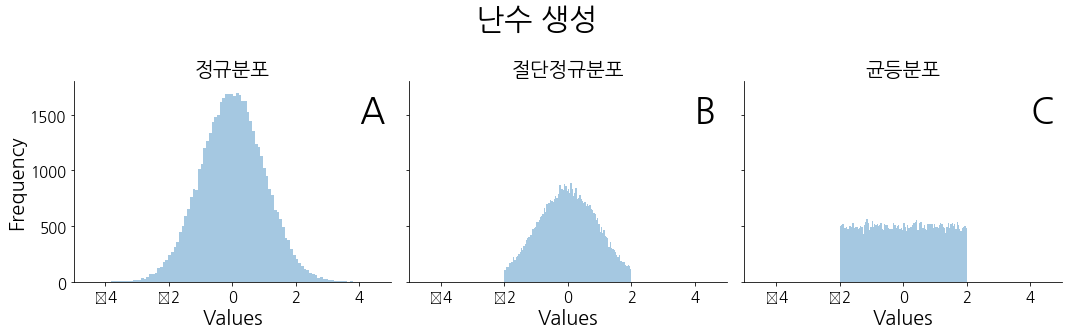

In [4]:
# matplotlib 설정 부분
def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.tick_params(axis='both', which='major', labelsize=15)
    
def get_axis_limits(ax, scale=.8):
    return ax.get_xlim()[1]*scale, ax.get_ylim()[1]*scale

f,axarr = plt.subplots(1,3,figsize=[15,4],sharey=True)
titles = ['정규분포','절단정규분포','균등분포']

for i,x in enumerate([x_normal,x_truncated,x_uniform]):
    ax = axarr[i]
    ax.hist(x[0], bins=100, alpha=0.4)
    ax.set_title(titles[i], fontsize=20)
    ax.set_xlabel('Values', fontsize=20)
    ax.set_xlim([-5, 5])
    ax.set_ylim([0, 1800])
    
    simpleaxis(ax)
    
axarr[0].set_ylabel('Frequency', fontsize=20)
plt.suptitle('난수 생성', fontsize=30, y=1.15)

for ax,letter in zip(axarr,['A','B','C']):
    simpleaxis(ax)
    ax.annotate(letter, xy=get_axis_limits(ax),fontsize=35)

plt.tight_layout()

`tf.InteractiveSession()`와 `.eval()`을 사용하면 텐서 객체의 데이터를 쉽게 확인할 수 있다. 

> `tf.InteractiveSession()`은 연산 실행에 필요한 세션을 저장할 변수를 따로 지정하지 않아도 된다. 주피터 노트북과 같은 대화형 파이썬 환경에서 사용할 때 편리하다.

아래의 예제는 `tf.InteractiveSession()`, `.eval()`을 사용한 예제이다.

In [5]:
sesss = tf.InteractiveSession()

# 0.0 ~ 4.0 을 같은 간격으로 5개 값 생성
c = tf.linspace(0.0, 4.0, 5)  

print("The content of 'c': \n {}\n".format(c.eval()))
sess.close()

The content of 'c': 
 [0. 1. 2. 3. 4.]



다음은 텐서플로에서 사용되는 초기화 함수를 표로 정리한 것이다.

| 텐서플로 연산                              | 설명                                                         |
| ------------------------------------------ | ------------------------------------------------------------ |
| `tf.constant(value)`                       | 인수 `value`에 지정한 값 또는 값들로 채워진 텐서를 생성      |
| `tf.fill(shape, value)`                    | `shape`에 지정한 형태의 텐서를 만들고, `value`에 지정한 값으로 초기화 |
| `tf.zeros(shape)`                          | `shape`에 지정한 형태의 텐서를 만들고, 모든 원소의 값을 `0`으로 초기화 |
| `tf.zeros_like(tensor)`                    | `tensor`와 동일한 타입과 형태의 텐서를 만들고, 모든 원소의 값을 `0`으로 초기화 |
| `tf.ones(shape)`                           | `shape`에 지정한 형태의 텐서를 만들고, 모든 원소의 값을 `1`로 초기화 |
| `tf.ones_like(tensor)`                     | `tensor`와 동일한 타입과 형태의 텐서를 만들고, 모든 원소의 값을 `1`로 초기화 |
| `tf.random_normal(shape, mean, stddev)`    | 정규분포를 따르는 난수를 생성                                |
| `tf.truncated_normal(shape, mean, stddev)` | 절단정규분포(평균을 기준으로 표준편차보다 크거나 작은 데이터를 제외)를 따르는 난수를 생성 |
| `tf.random_uniform(shape, minval, maxval)` | `[minval, maxval)` 구간의 균등분포의 값을 생성               |
| `tf.random_shuffle(tensor)`                | 첫 번째 차원에 따라 텐서를 무작위로 뒤섞음                   |



#### 행렬곱

텐서플로에서 행렬곱은 `tf.matmul()` 함수를 이용하여 연산을 수행한다. 예를 들어, 두 텐서 객체 A와 B의 행렬곱은 `tf.matmul(A, B)`로 계산할 수 있다.

In [8]:
A = tf.constant([[1, 2], 
                 [3, 4]])

B = tf.constant([[4, 3], 
                 [2, 1]])

AB = tf.matmul(A, B)

tf.InteractiveSession()
print('matmul restlt:\n {}'.format(AB.eval()))
sess.close()

matmul restlt:
 [[ 8  5]
 [20 13]]


d:\Users\cjh\miniconda3\envs\tensorflow\lib\site-packages\tensorflow\python\client\session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


### 3.3.4 이름

텐서플로에서는 각 텐서 객체마다 고유의 이름을 가진다. 이러한 이름은 텐서플로 내부에서 사용하는 string형태의 이름이다. 아래의 예제는 텐서 객체의 인자에 `name`을 사용해 이름을 지정한 뒤 `.name`속성을 통해 이름을 확인하는 코드다.

In [9]:
with tf.Graph().as_default():
    c1 = tf.constant(4, dtype=tf.float64, name='c')
    c2 = tf.constant(4, dtype=tf.int32, name='c')
    
print(c1.name)
print(c2.name)

c:0
c_1:0


위의 코드에서 `c1`과 `c2` 둘 다에 `name='c'`라고 하여 같은 이름 즉, 중복된 이름을 가진다. 텐서플로에서는 **하나의 그래프 내의 객체는 동일한 이름을 가질 수 없다**. 위의 코드와 같은 경우에는 `c1`과 `c2` 두 객체를 구분하기 위해 `_숫자`가 자동으로 붙는다. 

#### 이름 스코프

복잡한 그래프를 처리해야 하는 경우 이를 쉽게 추적하고 관리하기 위해서 노드를 이름별로 그룹화하여 묶는 것이 편리하다. `with`구문과 `tf.name_scope('prefix')`를 사용하면 이름 스코프를 사용할 수 있다.

아래의 예제는 `c2, c3`를 `prefix_name`이라는 스코프로 그룹화한 것이다. 출력결과를 보면 텐서 객체의 이름 앞에 접두사 형태로 `prefix_name`이 붙은 것을 알 수 있다. 

접두사는 그래프를 의미에 따라 서브그래프로 나누고자 할 때 유용하며, 그래프의 구조를 시각화할 때 사용할 수 있다.

In [10]:
with tf.Graph().as_default():
    c1 = tf.constant(4, dtype=tf.float64, name='c')
    with tf.name_scope("prefix_name"):
        c2 = tf.constant(4, dtype=tf.int32, name='c')
        c3 = tf.constant(4, dtype=tf.float64, name='c')

print('c1.name >>', c1.name)
print('c2.name >>', c2.name)
print('c3.name >>', c3.name)

c1.name >> c:0
c2.name >> prefix_name/c:0
c3.name >> prefix_name/c_1:0


## 3.4 변수, 플레이스홀더, 간단한 최적화

### 3.4.1 변수

딥러닝 학습에서 최적화 과정은 주어진 모델의 매개변수(parameters) 즉, 가중치(및 편향)를 조정하는 것이라 할 수 있다. 텐서플로에서는 이러한 최적화 과정에서 **변수(Variable)** 라는 객체를 사용한다. 변수는 세션이 실행될 때 마다 그래프에서 고정된 상태를 유지할 수 있다. 그렇기 때문에 변수는 최적화를 위한 반복 과정에서 현재의 변수가 다음 반복 과정에 영향을 줄 수 있다.

변수의 사용은 두 단계로 나뉜다.

1. `tf.Variable()`함수를 사용해 변수를 만들고 어떤 값으로 초기화할지를 정의한다.
2. `tf.global_variables_initializer()` 메소드를 사용하여 세션에 초기화 연산을 수행해야 하며, 변수에 메모리를 할당하고 초기값을 설정하는 역할을 한다.

다른 텐서 객체와 마찬가지로 변수 또한 그래프가 실행될 때 계산된다.

In [11]:
init_val = tf.random_normal((1, 5), 0, 1)
var = tf.Variable(init_val, name='var')
print("pre run: \n{}".format(var))

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    post_var = sess.run(var)
    
print('\npost run: \n{}'.format(post_var))

pre run: 
<tf.Variable 'var:0' shape=(1, 5) dtype=float32_ref>

post run: 
[[ 0.2887228   0.50184816  1.1468904  -0.30481052 -1.4262516 ]]


위의 코드를 다시 실행할 때 마다 변수 이름인 `var`에 `_숫자`가 붙는 것을 확인할 수 있다. 따라서, 세션을 실행할 때마다 값이 덮어씌어 지는것이 아니라 새로운 변수가 만들어지는 것을 알 수 있다.

### 3.4.2 플레이스홀더

딥러닝에서 데이터에 대한 학습이 이루어질 때 학습할 데이터들을 입력해줘야 한다. 예를 들어, [2장](http://excelsior-cjh.tistory.com/149)에서 잠깐 살펴보았던, MNIST 데이터를 학습한다고 할때 입력값으로 MNIST 이미지 데이터를 입력값으로 넣어 줘야 했다. 텐서플로에서는 입력값을 넣어주기 위해 **플레이스홀더(placeholder)**라는 것이 있다. 플레이스홀더는 데이터를 입력받는 비어있는 변수라고 생각할 수 있다. 먼저 그래프를 구성하고, 그 그래프가 실행되는 시점에 입력 데이터를 넣어주는 데 사용한다.

플레이스홀더는 `shape` 인수를 유동적으로 지정할 수 있다. 예를 들어, `None`으로 지정되면 이 플레이스홀더는 모든 크기의 데이터를 받을 수 있다. 주로 배치단위(batch size)의 샘플 데이터 개수에 해당 되는 부분(데이터의 행)은 `None`을 사용하고, 데이터 Feature의 길이(데이터의 열)는 고정된 값을 사용한다. 

```python
ph = tf.placeholder(tf.float32, shape=(None, 10))
```

플레이스홀더를 정의하면 반드시 그래프 실행 단계에서 입력값을 넣어줘야 하며, 그렇지 않을 경우 에러가 나타난다. 입력 데이터는 딕셔너리(dictionary)형태로 `session.run()`메소드를 통해 전달된다. 딕셔너리의 키(key)는 플레이스홀더 변수 이름에 해당하며 값(value)은 list 또는 NumPy 배열이다.

```python
sess.run(s, feed_dict={ph: data})
```

다음 예제를 통해 플레이스홀더에 입력데이터를 넣어주는 것을 알아보자.

In [12]:
x_data = np.random.randn(5, 10)
w_data = np.random.randn(10, 1)

with tf.Graph().as_default():
    x = tf.placeholder(tf.float32, shape=(5, 10))
    w = tf.placeholder(tf.float32, shape=(10, 1))
    b = tf.fill((5, 1), -1.)
    xw = tf.matmul(x, w)
    
    xwb = xw + b
    s = tf.reduce_max(xwb)
    with tf.Session() as sess:
        outs = sess.run(s, feed_dict={x: x_data, w: w_data})
    
    print("outs = {}".format(outs))

outs = 3.2797560691833496


### 3.4.3 최적화

#### 손실 함수 정의하기

모델을 최적화하기 위해서는 모델의 성능을 평가할 수 있는 척도가 필요하며, 모델이 예측한 값과 관측값 사이의 불일치 정도를 확인하려면 **'거리'**를 반영하는 척도가 필요하다. 이러한 거리를 **손실(loss)**함수라고 하며, 이 **함수의 값을 최소화하는 파라미터(가중치, 편향)을 찾아내는 것**이 딥러닝 모델을 최적화하는 것이다.

보통 손실함수는 실제와 이론을 모두 구려해 가장 적절한 것을 선택하므로 정확한 손실함수는 존재하지 않는다.

#### 평균제곱오차와 교차 엔트로피

#### 평균제곱오차(MSE)

가장 흔하게 사용되는 손실함수는 평균제곱오차(MSE, Mean Square Error)이다. 모든 데이터 샘플에서 실제 관측값과 모델 예측값 사이의 차를 제곱한 값의 평균이다.

$$
L \left(y, \hat{y}\right) = \frac{1}{n} \sum_{i=1}^{n}{\left( y_i - \hat{y}_i \right)^{2}}
$$

즉, 실제 관측된 값과 모델의 적합값(fitted value, 예측값) 사이의 차이(잔차, residual)의 제곱값의 평균을 최소화하는 것이다.

텐서플로에서는 다음과 같이 MSE를 계산할 수 있다. 

```python
loss = tf.reduce_mean(tf.square(y_true - y_pred))
# OR
loss = tf.losses.mean_squared_error(y_true, y_pred)
```

#### 교차 엔트로피 (Cross Entropy)

교차 엔트로피는 주로 범주형 데이터에 사용되는 손실함수이며, 다음과 같다.

$$
CEE = - \frac{1}{n} \sum_{i}{\left[ y_i \log \hat{y}_i + (1-y_i) \log \left( 1-\hat{y}_i \right) \right]}
$$

이를 텐서플로에서 다음과 같이 작성할 수 있다.

```python
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true, logits_y_pred)
loss = tf.reduce_mean(loss)
```

교차 엔트로피는 두 분포 사이의 유사성을 측정하는 척도이다. 딥러닝에서의 분류 모델은 각 클래스의 확률값을 계산하므로 실제 클래스(`y_true`)와 모델이 예측한 클래스(`y_pred`)를 비교할 수 있으며, 두 분포가 가까울수록 교차 엔트로피값은 더 작아진다.

#### 경사 하강법(Gradient Descent) 최적화 함수

딥러닝에서 손실함수를 최소화하는 다양한 최적화 알고리즘들이 있다. 가장 흔히 사용되는 알고리즘으로는 가중치의 집합에 대한 손실의 경사(기울기)를 이용한 **경사 하강법(gradient descent)**이 있다. 

$$
\mathrm{W} \leftarrow \mathrm{W} - \eta \frac{\partial L}{\partial \mathrm{W}}
$$

![](./images/gd.gif)

경사 하강법의 가장 보편적인 방법은 **확률적 경사 하강법(SGD, Stochastic Gradient Descent)**으로 학습해야할 전체 데이터를 계산하는 것이 아닌 일부 데이터를 미니배치(mini-batch, 50 ~ 500개 사이)단위로 추출하여 경사 하강법을 계산한다. 

#### 텐서플로의 경사 하강법

텐서플로에서는 경사 하강법을 간단하게 사용할 수 있다. 아래의 코드만 작성해주면 경사 하강법을 이용해 자동으로 경사값(기울기)을 구해준다. 

```python
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(loss)
```

### 3.4.4 예제를 통한 최적화 과정

앞에서 배운 내용을 토대로 선형회귀(Linear Regression)과 로지스틱 회귀(Logistic Regression) 두 모델의 매개변수(가중치, 편향)를 최적화 해보자.

#### 예제 1: Linear Regression

예제 1은 각 샘플에 가우시안 노이즈 $\varepsilon_i$를 추가한 입력 벡터 $x$일때 가중치 $w$와 편향값 $b$를 찾아내는 문제이다.

$$
y_i = w^{T} x_i + b + \varepsilon_i
$$

In [17]:
# === Create data and simulate results ===

# shape = (2000, 3)인 정규분포(mu=0, sigma=1)
x_data = np.random.randn(2000, 3)
w_real = [0.3, 0.5, 0.1]
b_real = -0.2

# 가우시안 노이즈
noise = np.random.randn(1, 2000) * 0.1

y_data = np.matmul(w_real, x_data.T) + b_real + noise

In [21]:
NUM_STEPS = 10

g = tf.Graph()
wb_ = []

with g.as_default():
    x = tf.placeholder(tf.float32, shape=[None, 3])
    y_true = tf.placeholder(tf.float32, shape=None)
    
    with tf.name_scope('inference') as scope:
        w = tf.Variable([[0, 0, 0]], dtype=tf.float32, name='weights')
        b = tf.Variable(0, dtype=tf.float32, name='bias')
        y_pred = tf.matmul(w, tf.transpose(x)) + b
        
    with tf.name_scope('loss') as scope:
        # loss = tf.reduce_mean(tf.square(y_true - y_pred))  # MSE
        loss = tf.losses.mean_squared_error(y_true, y_pred)
        
    with tf.name_scope('train') as scope:
        learning_rate = 0.5
        optimizer = tf.train.GradientDescentOptimizer(learning_rate)
        train = optimizer.minimize(loss)
        
    # Before starting, initialize the variables.
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        for step in range(NUM_STEPS):
            sess.run(train, feed_dict={x: x_data, y_true: y_data})
            if step % 5 == 0:
                print(step, sess.run([w, b]))
                wb_.append(sess.run([w, b]))
        print(10, sess.run([w, b]))

0 [array([[0.28029504, 0.4805126 , 0.10058896]], dtype=float32), -0.21319611]
5 [array([[0.29576042, 0.4981753 , 0.1022327 ]], dtype=float32), -0.20189795]
10 [array([[0.29576045, 0.4981753 , 0.1022327 ]], dtype=float32), -0.20189795]


위의 결과를 보면 10회 학습으로 추정 가중치 $\hat{w} = \left[0.29576045, 0.4981753 , 0.1022327 \right]$ 이고, 추정 편향값 $\hat{b} = -0.20189795$로 나타났다. 실제 매개변수 값인 $w = \left[0.3, 0.5 , 0.1 \right], b = -0.2$와 거의 비슷한 것을 알 수 있다.

#### 예제 2: Logistic Regression

이번에는 로지스틱 회귀를 알아보자. 로지스틱 회귀에서는 $w^{T} x + b$인 선형 성분은 로지스틱 함수인 비선형 함수의 입력이 되며, 이 함수의 결과값은 $[0, 1]$ 사이이다.

$$
\text{Pr} \left( y_i=1 | x_i \right) = \frac{1}{1+ \text{exp}^{wx_i - b}}
$$

예제 2번에서 사용하는 로지스틱 함수는 **시그모이드 함수(sigmoid function)**라고도 한다.

In [22]:
N = 20000

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# === Create data and simulate results ===
x_data = np.random.randn(N, 3)
w_real = [0.3, 0.5, 0.1]
b_real = -0.2
wxb = np.matmul(w_real, x_data.T) + b_real

y_data_pre_noise = sigmoid(wxb)  # 이진화 전
y_data = np.random.binomial(1, y_data_pre_noise)  # 이진화 후

In [26]:
NUM_STEPS = 100

g = tf.Graph()
wb_ = []
with g.as_default():
    x = tf.placeholder(tf.float32, shape=[None, 3])
    y_true = tf.placeholder(tf.float32, shape=None)
    
    with tf.name_scope('inference') as scope:
        w = tf.Variable([[0, 0, 0]], dtype=tf.float32, name='weights')
        b = tf.Variable(0, dtype=tf.float32, name='bias')
        y_pred = tf.matmul(w, tf.transpose(x)) + b
        
    with tf.name_scope('loss') as scope:
        loss =tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true, logits=y_pred)
        loss = tf.reduce_mean(loss)
        
    with tf.name_scope('train') as scope:
        learning_rate = 0.5
        optimizer = tf.train.GradientDescentOptimizer(learning_rate)
        train = optimizer.minimize(loss)
        
    # Before starting, initialize the variables
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        for step in range(NUM_STEPS):
            sess.run(train, feed_dict={x: x_data, y_true: y_data})
            if step % 10 == 0:
                print(step, sess.run([w, b]))
                wb_.append(sess.run([w, b]))
        
        print(100, sess.run([w, b]))

0 [array([[0.03201461, 0.05613991, 0.01390209]], dtype=float32), -0.02239997]
10 [array([[0.2018806 , 0.34991866, 0.08566012]], dtype=float32), -0.13928187]
20 [array([[0.25465283, 0.43867975, 0.10675137]], dtype=float32), -0.17420112]
30 [array([[0.2726871 , 0.46833742, 0.11364853]], dtype=float32), -0.1857122]
40 [array([[0.27905232, 0.47861528, 0.11599838]], dtype=float32), -0.18965253]
50 [array([[0.28132075, 0.48222345, 0.11681207]], dtype=float32), -0.19102146]
60 [array([[0.282131  , 0.48349622, 0.11709588]], dtype=float32), -0.19150014]
70 [array([[0.2824203 , 0.483946  , 0.11719528]], dtype=float32), -0.19166814]
80 [array([[0.28252348, 0.48410508, 0.11723018]], dtype=float32), -0.19172719]
90 [array([[0.28256023, 0.48416138, 0.11724245]], dtype=float32), -0.19174801]
100 [array([[0.28257257, 0.48418012, 0.11724652]], dtype=float32), -0.19175489]
